# Exercise 04:  Geopandas and vector topology in Python
O. Kaufmann, 2024.

In [67]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important information: Execute me to activate interactive questions.

***
## 1. Import packages	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<b>Note:</b><br>    To do this exercise, you need to import the pandas, geopandas and matplotlib.pyplot packages.


In [68]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

***
## 2. Load layers from a Geopackage	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>2.1 Get the names of layers stored in a geopackage</b>
</div>

In [ ]:

%%display_prompt --title Question 2.1.1: --prompt 486f772063616e20796f75206c69737420746865206c617965727320617661696c61626c6520696e20612067656f7061636b616765203f0a --answer 2020202067656f70616e6461732070726f766964657320746865206c6973745f6c617965722066756e6374696f6e
# @info: Execute me to display the question

Question 2.1.1: How can you list the layers available in a geopackage ?

<div class="alert alert-block alert-warning">
<b>Question 2.1.2: </b><br>List the layers available in the Charleroi_OSM_Extract geopackage stored under the data directory.
</div>

In [ ]:
# Expected outcome below...

,name,geometry_type
0,boundaries,Polygon
1,buildings,Unknown
2,landuse,Unknown
3,natural,Unknown
4,network_nodes,Point
5,network_edges,LineString
6,pois,Unknown
7,education,Unknown
8,railways,Unknown
9,waterways,Unknown


In [ ]:

%%display_prompt --title Question 2.1.3: --prompt 57686174206b696e64206f662067656f6d657472696573206172652073746f72656420696e207468652060626f756e6461726965736020616e6420606275696c64696e677360206c61796572733f0a --answer 2020202060626f756e6461726965736020636f6e7369737420696e20506f6c79676f6e73206f6e6c79207768696c65206275696c64696e677320617265206d697865642067656f6d657472792074797065732e
# @info: Execute me to display the question

Question 2.1.3: What kind of geometries are stored in the `boundaries` and `buildings` layers?

<div class="alert alert-block alert-success">
	<b>2.2 Load a layer</b>
</div>

In [ ]:

%%display_prompt --title Question 2.2.1: --prompt 4c6f6164207468652060626f756e64617269657360206c6179657220696e746f20612067656f646174616672616d65206e616d656420606764665f626f756e646172696573600a --answer 202020205573652074686520726561645f66696c652066756e6374696f6e2e20596f752063616e2066696e642068656c70206f6e2066756e6374696f6e732077697468696e20746865206e6f7465626f6f6b20696e203320776179733a20200a20202020312d2074797065207468652066756e6374696f6e207468656e20707265737320607368696674602b60544142602028652e672e2c206770642e726561645f66696c65202b20607368696674602b60544142602920746f207365652074686520646f63737472696e6720200a20202020322d20707265737320746865206054414260206b657920616674657220616e206f626a65637420746f2073656520746865206d6574686f647320617661696c61626c652028652e672e2c206770642e202b6054414260206f72206770642e72202b60544142602920200a20202020332d20707265737320605441426020616674657220747970696e672061206d6574686f6420286f722066756e6374696f6e2920746f207365652074686520616c6c6f77656420617267756d656e74732028652e672e2c206770642e726561645f66696c6528202b605441426020292020
# @info: Execute me to display the question

Question 2.2.1: Load the `boundaries` layer into a geodataframe named `gdf_boundaries`

<div class="alert alert-block alert-warning">
<b>Question 2.2.2: </b><br>Display the 3 first lines of the geodataframe
</div>

In [71]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e6764665f626f756e6461726965732e686561642833293c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


***
## 3. Manupulate a geodataframe	<img align="right" src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABmJLR0QA/wD/AP+gvaeTAAAACXBIWXMAAAbmAAAG5gFFAfPZAAAAB3RJTUUH3gwMFiIaKb3l3gAACBFJREFUeNrtW31sVWcZ/z23pSKtCYqXjW3R4DqEdpNVgzaKAXUE3ew2xRLHRKMuk3WajbQ6DW65M4jgGIiLZP5lxGmyofhBl8lWsMBWKBPWdC4zHRAj8lFoN6al68c9z88/7rnnnnPvOee+5/Z2O8a+bdP3vufet+f5Pc/v+TpvgakxNabG//OQydz85p90XDY+xuUk5wNIUpkkOZtkEqqzSU4nOUhiQKEDCYuDCgworAFR7R2aNv3Jo6mm4f8pAJpTL1UN1/S3KbEC1AaQQhLZHzhzLVzT3DV7bVjJXemE1da9YVV/7AG4aev+BbD0NySvR56QXuELBPV5n+uzyguk9bVDD32pPbYAND/xRMXwP5N/B1nLPC0bCVnwvoLPjhPaePih1cfKCUCiXBsNn0re5hZeiQNQ3CLUW0gccAsJHzAM1qZB8aulqV9MLycAleXaiMpPwhGeF6tGRj6z23ZgTandHW9UJE6DnOlvCcZrdcP/TtwAoD12FgBgDkEABIhdu13ee3eqaRjkrkINI0Tr8LcExYdjSQFSk9kbBazFIMV1UUguDtJwNFpYC2NJASEqNae9ecs3PPVg5Y/atwLAyA/a1xKcB9tC3F9AJAoAirfFEgDNi+tK3D+altaMRXBGqIZdYHgA8rMEEPF0gv5mO6O4k0Ow1vPsxfYv8QQgnMOYaAj0WEtMLUB3EjwMAqKEAlBbi2BWewQVUBD25CMErw8X3AfcOALw9Lobfxj1Mx/9zuMbYQNgnA+ovjUA3PRw5yeo2qDUBSCvAinM3kwm+QGhoNraZUbTtGjfswVQ7fBPQAmLOk+K5gPeNcfi+ltboViWd5uXkGAPVP6Ky9+xRySlEwagacu+JVTZqKqNICEej4wAhwav1xY6/ouusCcl+ANX8XIdBMsLuYjPAwqcfe0Znv3W7TLnkQslJ0JNWzpbVKWTZOPEkheftYJ8ACEUgCH3s9ZnAdBlsPQwz7VVlwRA08P7VqjiERNuolxrQfmAiefPCk51gWC9D+mhByMDcOvWv8wkEjtATZjk7xMscIzADdd6geCu1+l7+I875kYCwFL5MqkzvAmIqTZR1nwg1PQdITVPaIcGALUSSH8hEgBKfMMvAfHwFZNBi0KAfMZFW0szMwKGad+ei5oDcOPmve8ltc5IgEC+locC/gYvRzPVl7XIK6iP4Llri3iq+e1GAKhILVzaKFnDUQocn7UQs3+ep9ZeCdUrHMHhIzg8oAhGE1cbAZBQrTXOy8tW4Jimutzf8+ia/UiMLc8J7RIcIdYAvcYoESJZSzv/fjMLHINw90ZC9A6euyuJtGxyAHBif/5c7ejhXKs1o4CidvJjP6KGu1dILj22/e7jsPAoYL07hO8BlEhfY0YBYa1HHyVRoLS1PFu8APApCL+v1TMaetb1vch/rdkO1c8FJD1FKOFvAZWFFsC5Hs3Bx6EV0zB4VIh2Jbp1RI8c+dlXBidUap+5+4PQ9K9Bne8x9ayZO/MAGkT0Aa+DrA51aPn5QM7Dj4G8v6u6bzNSKeX5lhqkqxvwQOssI0kty56kAWA2yEbQaoQ1Ph9Q8XDaM88HpYD/AHW2WTVIniB5RQlcv2Apb+jevKqXZ9uWYk3rNiiuRUITRVP57M3CRKshjs4jdME+rxr5AJInS3NyaOnevKqX59rWQ7gXwAeM2u6FMTvPkUVxdGEJkQ6Y+QDihER2aPp4149v/y37W1eDXGfI7ADzLWrKAdrXkD0VIM8aASAZCkQqcNLpigd4/tuXg7rN8DlaOGcjOTpTUNhlRAELOBEx9g8e2fLFPlBvBfFOI62jSP5uWuQUpYTrtaY7jSygSiteGUeaAMUTAgMooGS3Ldsic5PP12oE7Yc6ukBKDKOm8rCRBexJffpVwudxNgILnJecHp1xt0Z9tGYFa7/A0Rns4/mb/L3M7Rwx7gfQ4mPGBY4y23mtit6t8RGGJYASBm5GWTsiNUQqx8Z2guw3a26qYbcmhMOBaWxEUPKtIzP6cG1XRyQAOjatfJ3AnSb5QGGSw4AbNIjZxUzZNPa7b0oSLSLQyF3hA+tX/EmATUXzAc/eNNRaEKcNQQkD1xPT5adSf3Bvyc8FDmxo/q5SP0vwdGA+oDbcWmJ4oiEoRSnhMcX/gPJ1qX/2ngk/GeradNuTAK5afN+O94xbFQ1UzrFzxsy38IWSw5xaf0CCezL3rs6enrrASZzUaVhk5pbrtWOBQ6hAD/525cuycqf1ph6T45lv9oBcaFiaZo+7fE+u3rkRb+EoHwCn78oA4CtoIChDIC8FJjlgTuPZfUT3Sd3BVTE8IBGlNHXmNaDWRCpxFe+K6QkRg8ZEaWms6zpR7uPN5QXAvDQt5icswPojyFkAl3jDW3mPiJQPAFg5jU6syBkDWS/1+48DAF/82DIInnYH93ICUL6ToqoDZYn90N9JfedxR9zrnnsGwAsuCxiMJwBId0V6UhMISnrUp6YadTGgO6YWgA7zfD4s88NKHvt40pG3d/GHIGjM3TEPxjIPAACebP45qHdG6+W53+eMIYA7IDIrc+YH0+x+3Tap77o3pk4QwDTci1F9P6hLojU4Cxx7DSAtect/xvmqtthmgjmKphLoO7YWYq0HdXqRXr3JlpcAuQ/1z24XKfdB2Un8rzGevPkyjI6sBvhVwD5wka/98NEL4S+RxmOysOt87GuBUDBe/tQsaLoOYB2gCzK/UQciCeAiBK9B0Q/weQgOoVIOyfznzmBqTI2pMTUmefwX5Mz8p5zVbn8AAAAASUVORK5CYII=" width="24"/>

<div class="alert alert-block alert-success">
	<b>3.1 Clean the dataset and organise data</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.1.1: </b><br>Keep the `name`, `admin_level`, `id` and `geometry` columns and remove all the others
</div>

In [72]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e6764665f626f756e646172696573203d206764665f626f756e6461726965735b5b276964272c20276e616d65272c202761646d696e5f6c6576656c272c202767656f6d65747279275d5d3c62723e0a6764665f626f756e6461726965732e686561642833293c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


<div class="alert alert-block alert-warning">
<b>Question 3.1.2: </b><br>Plot a map of the dataset, use the admin_level column to color the geometrical entities 
</div>

<Axes: >

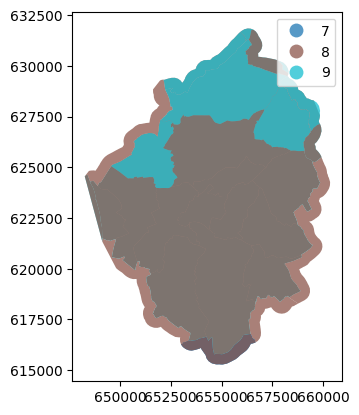

In [ ]:
# Expected outcome below...

## @subsection @python_code | Queries on a geodataframe

<div class="alert alert-block alert-warning">
<b>Question 3.1.3: </b><br>Using a query, display a restiction of the geodataframe where admin_level equals 7.
</div>

In [74]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e6764665f626f756e6461726965732e7175657279282761646d696e5f6c6576656c3d3d22372227293c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


In [ ]:
# Expected outcome below...

,id,name,admin_level,geometry
9,77329202,Charleroi,7,"POLYGON ((653068.361 616282.151, 653094.873 61..."
10,70404415,Thuin,7,"POLYGON ((653068.361 616282.151, 653094.873 61..."


<div class="alert alert-block alert-warning">
<b>Question 3.1.4: </b><br>Where are located these two polygons? Plot them with a legend.
</div>

<b>Note:</b><br>    You may also use the explore() method foran interactive map...


In [76]:
gdf_boundaries.query('admin_level=="7"').explore()

<div class="alert alert-block alert-warning">
<b>Question 3.1.5: </b><br>Use a query to select the entity corresponding to the `Ville de Charleroi` and store the result in a new geodataframe named `ville_de_charleroi`. Display that geodataframe and plot the map.
</div>

,id,name,admin_level,geometry
21,53202582,Charleroi,8,"POLYGON ((648541.281 624300.698, 648694.961 62..."


<Axes: >

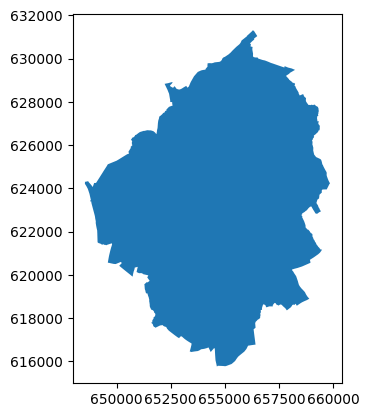

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-success">
	<b>3.2 Use joins and spatial joins</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.1: </b><br>Select sections (former municipalities, admin_level 9) and store them in a new geodataframe named `sections`, then plot the map using the name to colour the sections. What do you notice?
</div>

<Axes: >

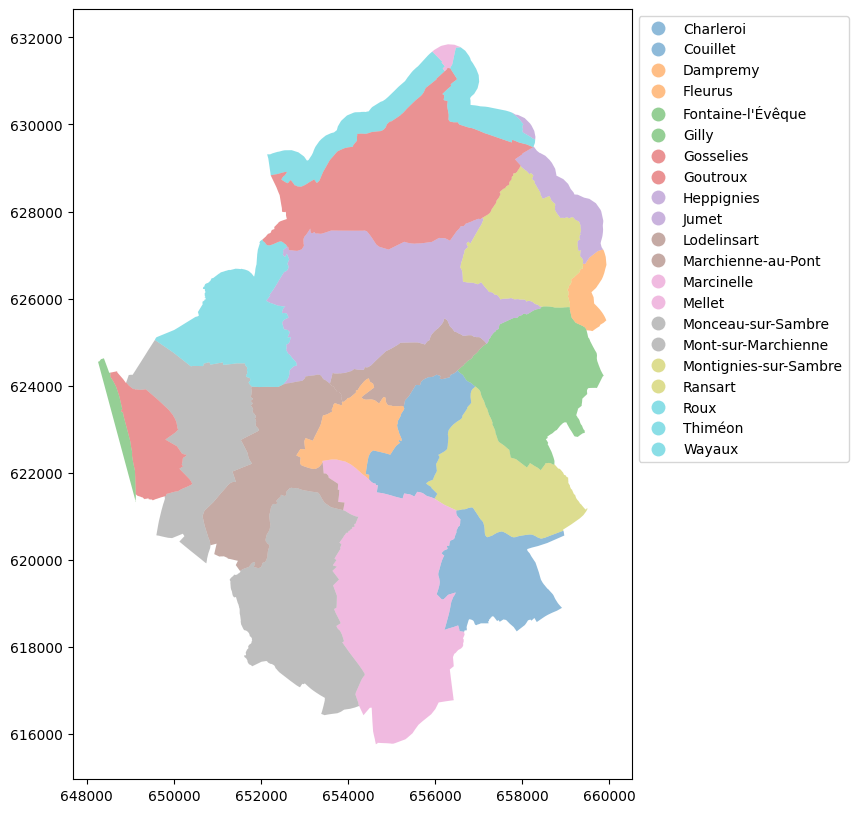

In [ ]:
# Expected outcome below...

In [ ]:

%%display_prompt --title Question 3.2.2: --prompt 557365207468652076696c6c655f64655f636861726c65726f692067656f646174616672616d6520746f2073656c656374207468652073656374696f6e732074686174206172652070617274206f66207468652056696c6c6520646520436861726c65726f6920616e6420646973706c6179207468652067656f646174616672616d652061732061207461626c652e0a --answer 202020204c6f6f6b20696e746f20746865207370617469616c206a6f696e732028736a6f696e2920616e642073656c65637420746865207269676874207072656469636174652e2e2e
# @info: Execute me to display the question

Question 3.2.2: Use the ville_de_charleroi geodataframe to select the sections that are part of the Ville de Charleroi and display the geodataframe as a table.

In [ ]:
# Expected outcome below...

,id__left,name__left,admin_level__left,geometry,index__right,id__right,name__right,admin_level__right
1,187062874,Couillet,9,"POLYGON ((656538.485 621142.351, 656566.717 62...",21,53202582,Charleroi,8
3,170007362,Montignies-sur-Sambre,9,"POLYGON ((655838.494 621798.268, 655865.221 62...",21,53202582,Charleroi,8
4,183651705,Charleroi,9,"POLYGON ((654482.625 621954.612, 654402.956 62...",21,53202582,Charleroi,8
5,166597420,Gilly,9,"POLYGON ((656545.345 624379.405, 656562.771 62...",21,53202582,Charleroi,8
6,176829509,Lodelinsart,9,"POLYGON ((653592.794 624091.906, 653612.823 62...",21,53202582,Charleroi,8
7,173418426,Jumet,9,"POLYGON ((652542.811 624069.097, 652571.794 62...",21,53202582,Charleroi,8
13,190474056,Marcinelle,9,"POLYGON ((653407.416 622273.6, 653624.672 6223...",21,53202582,Charleroi,8
14,200708499,Mont-sur-Marchienne,9,"POLYGON ((651518.794 619747.429, 651516.046 61...",21,53202582,Charleroi,8
15,204120468,Marchienne-au-Pont,9,"POLYGON ((650822.895 620439.654, 650794.567 62...",21,53202582,Charleroi,8
16,197297009,Monceau-sur-Sambre,9,"POLYGON ((648931.322 624152.146, 648963.617 62...",21,53202582,Charleroi,8


<div class="alert alert-block alert-warning">
<b>Question 3.2.3: </b><br>Display the geodataframe as a map, using the name of the sections to colour them.
</div>

<Axes: >

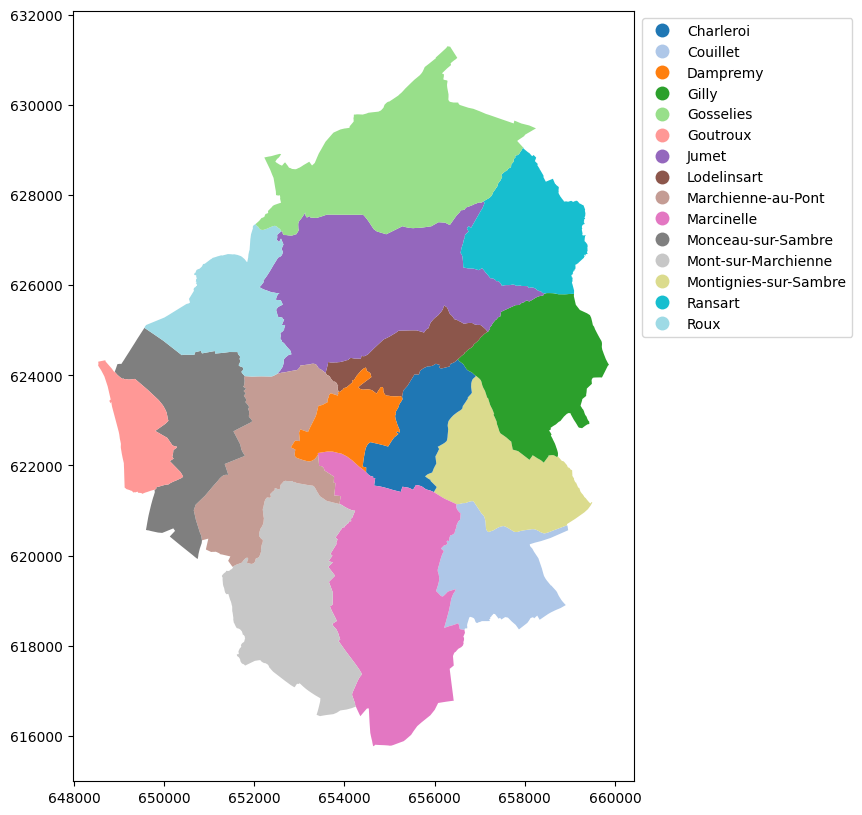

In [ ]:
# Expected outcome below...

In [ ]:

%%display_prompt --title Question 3.2.4: --prompt 52656e616d652074686520636f6c756d6e73206f66207468652073656374696f6e732067656f646174616672616d6520617320666f6c6c6f77733a206069645f5f6c65667460617320606964602c20606e616d655f5f6c6566746020617320606e616d655f5f73656374696f6e602c206061646d696e5f6c6576656c5f5f6c65667460206173206061646d696e5f6c6576656c602c20606e616d655f5f72696768746020617320606e616d655f746f776e602c207468656e2064726f70207468652060696e6465785f5f7269676874602c2060c3ac645f5f72696768746020616e64206061646d696e5f6c6576656c5f5f72696768746020636f6c756d6e732e0a --answer 2020202055736520612064696374696f6e6172792077697468207468652072656e616d652066756e6374696f6e20616e6420757365207468652064726f702066756e6374696f6e2e2050617920617474656e74696f6e20746f20746865206178697320616e642075736520696e706c6163653d54727565207768656e206e65656465642e
# @info: Execute me to display the question

Question 3.2.4: Rename the columns of the sections geodataframe as follows: `id__left`as `id`, `name__left` as `name__section`, `admin_level__left` as `admin_level`, `name__right` as `name_town`, then drop the `index__right`, `ìd__right` and `admin_level__right` columns.

In [ ]:
# Expected outcome below...

,id,name_section,admin_level,geometry,name_town
1,187062874,Couillet,9,"POLYGON ((656538.485 621142.351, 656566.717 62...",Charleroi
3,170007362,Montignies-sur-Sambre,9,"POLYGON ((655838.494 621798.268, 655865.221 62...",Charleroi
4,183651705,Charleroi,9,"POLYGON ((654482.625 621954.612, 654402.956 62...",Charleroi
5,166597420,Gilly,9,"POLYGON ((656545.345 624379.405, 656562.771 62...",Charleroi
6,176829509,Lodelinsart,9,"POLYGON ((653592.794 624091.906, 653612.823 62...",Charleroi
7,173418426,Jumet,9,"POLYGON ((652542.811 624069.097, 652571.794 62...",Charleroi
13,190474056,Marcinelle,9,"POLYGON ((653407.416 622273.6, 653624.672 6223...",Charleroi
14,200708499,Mont-sur-Marchienne,9,"POLYGON ((651518.794 619747.429, 651516.046 61...",Charleroi
15,204120468,Marchienne-au-Pont,9,"POLYGON ((650822.895 620439.654, 650794.567 62...",Charleroi
16,197297009,Monceau-sur-Sambre,9,"POLYGON ((648931.322 624152.146, 648963.617 62...",Charleroi


<div class="alert alert-block alert-warning">
<b>Question 3.2.5: </b><br>Search for the sections that border the Charleroi section, name them charleroi_neighbours. Plot them in blue and plot the Charleroi section in orange.
</div>

<Axes: >

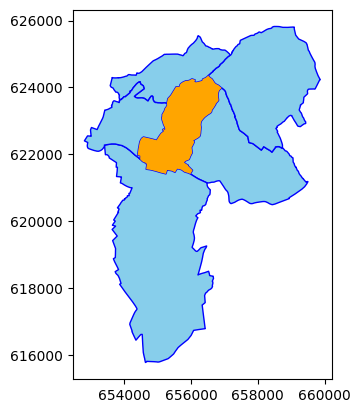

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-warning">
<b>Question 3.2.6: </b><br>Drop the _right columns and restore left columns names to their original name then set id as the index.
    Examine as the proposed solution below uses list and dict comprehension to automate this task.
</div>

In [16]:

%%display_prompt --title=none --prompt 496620796f752067657420737475636b2c20636c69636b206f6e2074686520627574746f6e2062656c6f7720666f72206120736f6c7574696f6e --answer 3c636f64653e746f5f64726f70203d205b6320666f72206320696e20636861726c65726f695f6e65696768626f7572732e636f6c756d6e7320696620275f72696768742720696e20635d3c62723e0a636861726c65726f695f6e65696768626f7572732e64726f7028746f5f64726f702c20617869733d27636f6c756d6e73272c20696e706c6163653d54727565293c62723e0a72656e616d655f64696374203d207b633a632e73706c697428275f6c65667427295b305d20666f72206320696e20636861726c65726f695f6e65696768626f7572732e636f6c756d6e737d3c62723e0a636861726c65726f695f6e65696768626f7572732e72656e616d652872656e616d655f646963742c20617869733d27636f6c756d6e73272c20696e706c6163653d54727565293c62723e0a636861726c65726f695f6e65696768626f7572732e7365745f696e64657828276964272c20696e706c6163653d54727565293c62723e0a636861726c65726f695f6e65696768626f7572733c2f636f64653e
# @info: Execute me to get access to interactions

# @info: Execute me to get access to interactions


In [ ]:
# Expected outcome below...

,name_section,admin_level,geometry,name_town
id,,,,
170007362,Montignies-sur-Sambre,9,"POLYGON ((655838.494 621798.268, 655865.221 62...",Charleroi
166597420,Gilly,9,"POLYGON ((656545.345 624379.405, 656562.771 62...",Charleroi
176829509,Lodelinsart,9,"POLYGON ((653592.794 624091.906, 653612.823 62...",Charleroi
190474056,Marcinelle,9,"POLYGON ((653407.416 622273.6, 653624.672 6223...",Charleroi
180240596,Dampremy,9,"POLYGON ((653395.942 622209.52, 653360.525 622...",Charleroi


In [1]:
## @subsection | Make a join between a geodataframe and a dataframe

<div class="alert alert-block alert-warning">
<b>Question 3.2.7: </b><br>Load data about the sections from the csv file `Charleroi_sections.csv` (in the `data` directory) into a pandas dataframe named `df_sections`. Set the name column as an index. What are the columns in this dataframe?
</div>

In [17]:
### @answer @keep_output
df_sections = pd.read_csv('./data/Charleroi_sections.csv', sep='\t')
df_sections.set_index('Name', inplace=True)
df_sections

,Id,Area,Population,INS_code
Name,,,,
Charleroi,1,3.85,20144,52011A
Dampremy,2,2.75,6807,52011B
Lodelinsart,3,2.95,8459,52011C
Gilly,4,7.39,19957,52011D
Montignies-sur-Sambre,5,6.04,18641,52011E
Couillet,6,5.00,11458,52011F
Marcinelle,7,13.22,23604,52011G
Mont-sur-Marchienne,8,9.27,12565,52011H
Marchienne-au-Pont,9,6.74,15064,52011J


In [ ]:

%%display_prompt --title Question 3.2.8: --prompt 4a6f696e2074686520646174616672616d6520746f20746865206073656374696f6e73602067656f646174616672616d652c207468656e20646973706c6179207468652067656f646174616672616d652061732061207461626c6520616e642061732061206d617020636f6c6f7572696e67207468652073656374696f6e7320627920746865697220706f70756c6174696f6e2e0a --answer 20202020496620796f7520776f756c64207365742074686520606e616d655f73656374696f6e6020636f6c756d6e2061732074686520696e646578206f66206073656374696f6e73602c20796f75206d6967687420757365202e6a6f696e20286e6f74207265636f6d6d656e6465642068657265292e204f74686572776973652c20796f752063616e20757365202e6d657267652e2e2e
# @info: Execute me to display the question

Question 3.2.8: Join the dataframe to the `sections` geodataframe, then display the geodataframe as a table and as a map colouring the sections by their population.

,name_section,admin_level,geometry,name_town,Id,Area,Population,INS_code
id,,,,,,,,
187062874,Couillet,9,"POLYGON ((656538.485 621142.351, 656566.717 62...",Charleroi,6,5.00,11458,52011F
170007362,Montignies-sur-Sambre,9,"POLYGON ((655838.494 621798.268, 655865.221 62...",Charleroi,5,6.04,18641,52011E
183651705,Charleroi,9,"POLYGON ((654482.625 621954.612, 654402.956 62...",Charleroi,1,3.85,20144,52011A
166597420,Gilly,9,"POLYGON ((656545.345 624379.405, 656562.771 62...",Charleroi,4,7.39,19957,52011D
176829509,Lodelinsart,9,"POLYGON ((653592.794 624091.906, 653612.823 62...",Charleroi,3,2.95,8459,52011C
173418426,Jumet,9,"POLYGON ((652542.811 624069.097, 652571.794 62...",Charleroi,13,12.65,24585,52011N
190474056,Marcinelle,9,"POLYGON ((653407.416 622273.6, 653624.672 6223...",Charleroi,7,13.22,23604,52011G
200708499,Mont-sur-Marchienne,9,"POLYGON ((651518.794 619747.429, 651516.046 61...",Charleroi,8,9.27,12565,52011H
204120468,Marchienne-au-Pont,9,"POLYGON ((650822.895 620439.654, 650794.567 62...",Charleroi,9,6.74,15064,52011J


<Axes: >

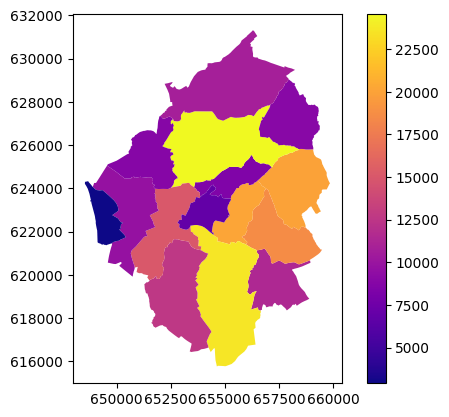

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-warning">
<b>Question 3.2.9: </b><br>Compare the total population that live in Charleroi to the population in the sections in its immediate neighbourhood.
</div>

In [ ]:
# Expected outcome below...

Population in the Charleroi section: 20144
Population in the neighbourhood: 77468


<div class="alert alert-block alert-warning">
<b>Question 3.2.10: </b><br>Load the buildings layer into the `buildings' geodataframe. Keep only the `id` and `geometry` columns. How many entities have a geometry different from `Polygon`?
### @anwser
    12
</div>

In [ ]:
# Expected outcome below...

,id,geometry
36912,826287043,"LINESTRING (659044.656 624345.653, 659044.69 6..."
44315,834784953,"LINESTRING (652586.067 623537.041, 652586.033 ..."
51310,1167107624,"LINESTRING (655331.298 622172.331, 655331.433 ..."
51627,1167110650,"LINESTRING (655272.004 622336.046, 655272.139 ..."
51892,1167112040,"LINESTRING (655367.82 622391.739, 655367.854 6..."
58252,1019525893,"LINESTRING (655101.548 624670.401, 655101.514 ..."
58260,1019525904,"LINESTRING (655177.279 624747.284, 655177.245 ..."
60540,1019526048,"LINESTRING (654620.321 625687.39, 654620.219 6..."
65284,837347619,"LINESTRING (654224.756 628923.223, 654224.417 ..."
68525,1226710361,"LINESTRING (651037.288 626349.904, 651037.389 ..."


In [ ]:

%%display_prompt --title Question 3.2.11: --prompt 46696c74657220606275696c64696e67736020746f206b656570206f6e6c792074686520706f6c79676f6e732e20486f77206d616e79206275696c64696e67732061726520746865726520696e207468652066696c74657265642067656f646174616672616d653f0a --answer 202020203737323837
# @info: Execute me to display the question

Question 3.2.11: Filter `buildings` to keep only the polygons. How many buildings are there in the filtered geodataframe?

<div class="alert alert-block alert-warning">
<b>Question 3.2.12: </b><br>Plot a map of `buildings' coloured by the section they are in.
</div>

<Axes: >

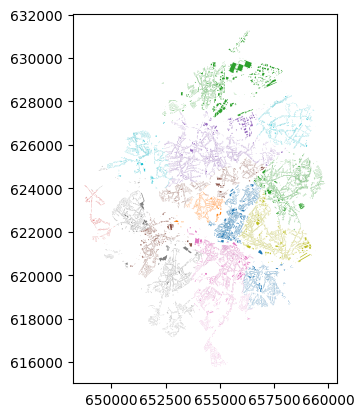

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-warning">
<b>Question 3.2.13: </b><br>Compute for each section of the Ville de Charleroi the ratio between the number of buildings within the section to the population of the section.
</div>

<Axes: >

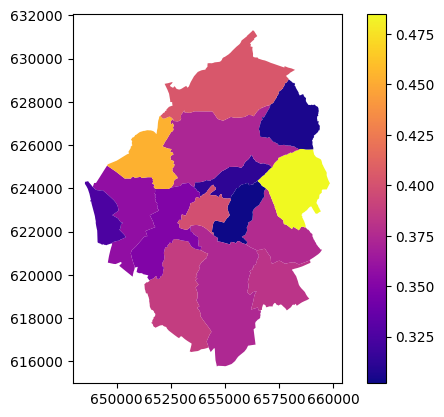

In [ ]:
# Expected outcome below...

<div class="alert alert-block alert-warning">
<b>Question 3.2.14: </b><br>Compute for each section of the Ville de Charleroi the ratio between the total surface of buildings within the section to the total area of the section.
</div>

<Axes: >

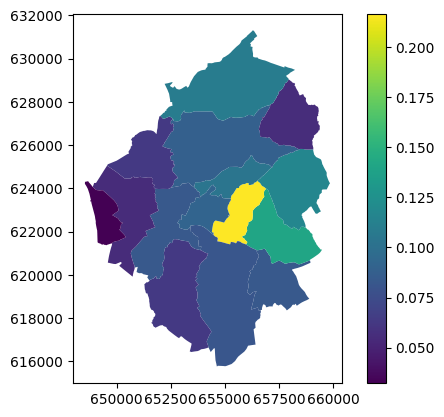

In [ ]:
# Expected outcome below...